Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install factor-analyzer 

     |████████████████████████████████| 40 kB 3.0 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=dea08c64fe816040aa38d2d36bb15aa2e60d65e17a5b79be06cd6776cb98faf5
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer


In [21]:
from google.colab import files
uploaded = files.upload()

Saving user_behaviour.xlsx to user_behaviour.xlsx


#Read survey data & drop columns (name,email etc...)

In [237]:
#df = pd.read_excel("C:\\Users\\lenovo\\Desktop\\USER PARTICIPATION SURVEY\\user_behaviour.xlsx")
df = pd.read_excel("user_behaviour.xlsx")
print(df.columns)
df_main=pd.read_excel("user_behaviour.xlsx")
df_main = df_main.drop(['Name','Email','City','Unnamed: 8','Unnamed: 20','Unnamed: 21','Timestamp','GeoStamp','GeoCode','GeoAddress','Any other potential reason, for non-participation of the user in social activities which you think, should be checked to get more insights for user behavior'], axis='columns')

df = df.drop(['Name','Email','City','Unnamed: 8','Gender','Unnamed: 20','Unnamed: 21','Timestamp','GeoStamp','GeoCode','GeoAddress',"Highest Qualification",'Any other potential reason, for non-participation of the user in social activities which you think, should be checked to get more insights for user behavior'], axis='columns')


Index(['Timestamp', 'Name', 'Gender', 'Email', 'City',
       'Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities',
       'People think that they don’t have something valuable and worthwhile to contribute to society.',
       'No direct benefit/reputation for participating in social activities',
       'Unnamed: 8',
       ' People have the desire to change  but not sure what to contribute, how and when to contribute',
       'The cultural limitation doesn't allow the user to participate in social good initiatives',
       'It feels good to get involved in the social activities ',
       'Lack of user participation is due to no formal outcomes',
       ' User want s to participate but wants to keep their identity secret',
       ' The user wants to participate but scared of political scenarios in the country',
       'Lack of appreciation  for each person’s contribution to society',
       'Personal life issues and 

# display 5 rows in data frame

In [88]:
df.head()

,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,People think that they don’t have something valuable and worthwhile to contribute to society.,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
0,5.0,5,5.0,3.0,3.0,5.0,5.0,5.0,3.0,5.0,1.0,5.0
1,5.0,2,5.0,3.0,5.0,4.0,5.0,4.0,5.0,5.0,3.0,5.0
2,5.0,4,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0
3,5.0,3,4.0,5.0,4.0,5.0,5.0,1.0,2.0,4.0,5.0,5.0
4,4.0,4,1.0,5.0,3.0,5.0,4.0,5.0,2.0,3.0,5.0,3.0


In [89]:
df.describe()

,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,92.000000
mean,3.580645,3.000000,3.956989,3.258065,4.268817,3.645161,3.225806,3.548387,3.677419,3.703297,4.054348
std,1.045930,1.233588,0.919759,1.051947,0.979572,0.985163,1.198994,1.175068,1.023223,1.100449,0.930132
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [90]:
df.shape

(193, 12)

In [91]:
df=df.dropna()

In [92]:
df.shape

(90, 12)

In [82]:
df.shape

(90, 13)

In [93]:
df.corr()


,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,1.000000,0.183143,0.293514,0.069344,0.221634,0.067707,0.159141,0.348200,0.248406,0.223816,0.239713
No direct benefit/reputation for participating in social activities,0.183143,1.000000,-0.018655,0.263392,0.010828,0.216355,-0.028369,0.148161,0.298770,0.165690,0.194636
"People have the desire to change but not sure what to contribute, how and when to contribute",0.293514,-0.018655,1.000000,0.008059,0.415903,-0.024157,0.057883,0.270668,0.209495,0.397069,0.081293
The cultural limitation doesn't allow the user to participate in social good initiatives,0.069344,0.263392,0.008059,1.000000,0.023581,0.193971,0.144755,0.092862,0.164873,0.248883,0.154342
It feels good to get involved in the social activities,0.221634,0.010828,0.415903,0.023581,1.000000,0.115493,0.231990,0.106611,0.190703,0.216238,0.358208
Lack of user participation is due to no formal outcomes,0.067707,0.216355,-0.024157,0.193971,0.115493,1.000000,0.161328,0.083442,0.175205,0.066528,0.440829
User want s to participate but wants to keep their identity secret,0.159141,-0.028369,0.057883,0.144755,0.231990,0.161328,1.000000,0.216654,-0.081799,-0.115778,-0.118479
The user wants to participate but scared of political scenarios in the country,0.348200,0.148161,0.270668,0.092862,0.106611,0.083442,0.216654,1.000000,0.442108,0.211011,0.316696
Lack of appreciation for each person’s contribution to society,0.248406,0.298770,0.209495,0.164873,0.190703,0.175205,-0.081799,0.442108,1.000000,0.252904,0.412425
Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,0.223816,0.165690,0.397069,0.248883,0.216238,0.066528,-0.115778,0.211011,0.252904,1.000000,0.123417


In [94]:
covar_matrix = PCA(n_components = len(df.columns)) #components are equal to the number of features we have
covar_matrix.fit(df)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

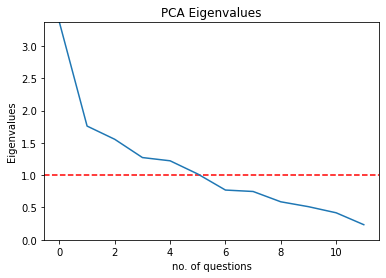

In [95]:
plt.ylabel('Eigenvalues')
plt.xlabel('no. of questions')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

In [96]:
components = pd.DataFrame(covar_matrix.components_ ,columns = df.columns)
components.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)

# Top 3 positive contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:, :3]], 
                  index=components.index,
                  columns = ['1st Max','2nd Max','3rd Max'])

,1st Max,2nd Max,3rd Max
PC-1,User want s to participate but wants to keep ...,Lack of user participation is due to no formal...,The cultural limitation doesn't allow the user...
PC-2,No direct benefit/reputation for participating...,Lack of appreciation for each person’s contri...,The cultural limitation doesn't allow the user...
PC-3,Personal life issues and time limitaions dosen...,People have the desire to change but not sur...,It feels good to get involved in the social ac...
PC-4,People think that they don’t have something va...,No direct benefit/reputation for participating...,Lack of motivation and unsupportive environmen...
PC-5,Personal life issues and time limitaions dosen...,The cultural limitation doesn't allow the user...,People have the desire to change but not sur...
PC-6,It feels good to get involved in the social ac...,No direct benefit/reputation for participating...,People think that they don’t have something va...
PC-7,Lack of motivation and unsupportive environmen...,Personal life issues and time limitaions dosen...,No direct benefit/reputation for participating...
PC-8,No direct benefit/reputation for participating...,It feels good to get involved in the social ac...,User want s to participate but wants to keep ...
PC-9,Lack of user participation is due to no formal...,People think that they don’t have something va...,People have the desire to change but not sur...
PC-10,The user wants to participate but scared of p...,People will participate in social activities i...,It feels good to get involved in the social ac...


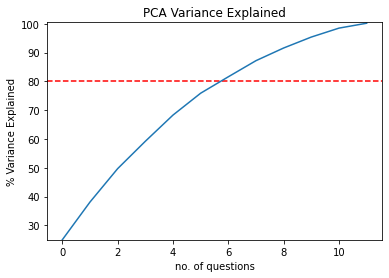

In [97]:
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('no. of questions')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [98]:
components = pd.DataFrame(covar_matrix.components_ ,columns = df.columns)
components.rename(index = lambda x: 'PC-' + str(x + 1), inplace=True)

# Top 3 positive contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:, :3]], 
                  index=components.index,
                  columns = ['1st Max','2nd Max','3rd Max'])

,1st Max,2nd Max,3rd Max
PC-1,User want s to participate but wants to keep ...,Lack of user participation is due to no formal...,The cultural limitation doesn't allow the user...
PC-2,No direct benefit/reputation for participating...,Lack of appreciation for each person’s contri...,The cultural limitation doesn't allow the user...
PC-3,Personal life issues and time limitaions dosen...,People have the desire to change but not sur...,It feels good to get involved in the social ac...
PC-4,People think that they don’t have something va...,No direct benefit/reputation for participating...,Lack of motivation and unsupportive environmen...
PC-5,Personal life issues and time limitaions dosen...,The cultural limitation doesn't allow the user...,People have the desire to change but not sur...
PC-6,It feels good to get involved in the social ac...,No direct benefit/reputation for participating...,People think that they don’t have something va...
PC-7,Lack of motivation and unsupportive environmen...,Personal life issues and time limitaions dosen...,No direct benefit/reputation for participating...
PC-8,No direct benefit/reputation for participating...,It feels good to get involved in the social ac...,User want s to participate but wants to keep ...
PC-9,Lack of user participation is due to no formal...,People think that they don’t have something va...,People have the desire to change but not sur...
PC-10,The user wants to participate but scared of p...,People will participate in social activities i...,It feels good to get involved in the social ac...


In [99]:
df.corr() #data output


,Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,No direct benefit/reputation for participating in social activities,"People have the desire to change but not sure what to contribute, how and when to contribute",The cultural limitation doesn't allow the user to participate in social good initiatives,It feels good to get involved in the social activities,Lack of user participation is due to no formal outcomes,User want s to participate but wants to keep their identity secret,The user wants to participate but scared of political scenarios in the country,Lack of appreciation for each person’s contribution to society,Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,People will participate in social activities if their opinions are valued
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,1.000000,0.183143,0.293514,0.069344,0.221634,0.067707,0.159141,0.348200,0.248406,0.223816,0.239713
No direct benefit/reputation for participating in social activities,0.183143,1.000000,-0.018655,0.263392,0.010828,0.216355,-0.028369,0.148161,0.298770,0.165690,0.194636
"People have the desire to change but not sure what to contribute, how and when to contribute",0.293514,-0.018655,1.000000,0.008059,0.415903,-0.024157,0.057883,0.270668,0.209495,0.397069,0.081293
The cultural limitation doesn't allow the user to participate in social good initiatives,0.069344,0.263392,0.008059,1.000000,0.023581,0.193971,0.144755,0.092862,0.164873,0.248883,0.154342
It feels good to get involved in the social activities,0.221634,0.010828,0.415903,0.023581,1.000000,0.115493,0.231990,0.106611,0.190703,0.216238,0.358208
Lack of user participation is due to no formal outcomes,0.067707,0.216355,-0.024157,0.193971,0.115493,1.000000,0.161328,0.083442,0.175205,0.066528,0.440829
User want s to participate but wants to keep their identity secret,0.159141,-0.028369,0.057883,0.144755,0.231990,0.161328,1.000000,0.216654,-0.081799,-0.115778,-0.118479
The user wants to participate but scared of political scenarios in the country,0.348200,0.148161,0.270668,0.092862,0.106611,0.083442,0.216654,1.000000,0.442108,0.211011,0.316696
Lack of appreciation for each person’s contribution to society,0.248406,0.298770,0.209495,0.164873,0.190703,0.175205,-0.081799,0.442108,1.000000,0.252904,0.412425
Personal life issues and time limitaions dosen't allow user to participate in social good initiatives,0.223816,0.165690,0.397069,0.248883,0.216238,0.066528,-0.115778,0.211011,0.252904,1.000000,0.123417


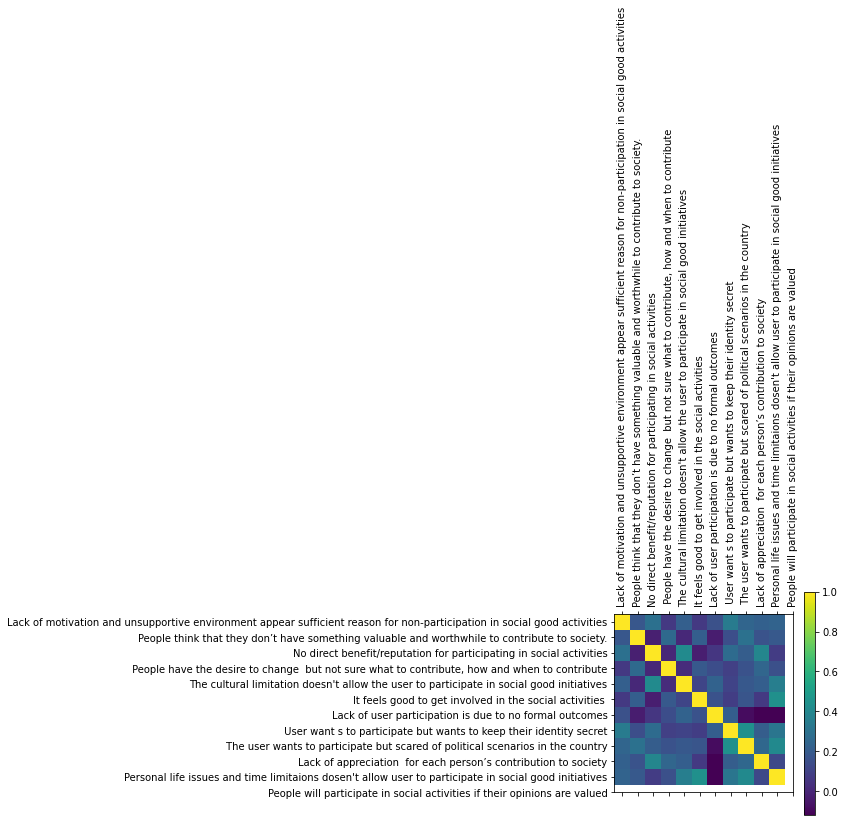

In [100]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()


In [101]:
fa = FactorAnalyzer(rotation=None, n_factors=len(df.columns))
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.00808505, 1.5375029 , 1.27228112, 1.21777025, 1.05949344,
       0.86047635, 0.70516776, 0.63844971, 0.59302067, 0.46543757,
       0.41309147, 0.22922372])

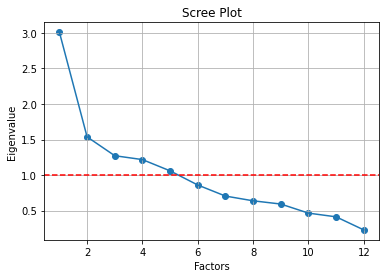

In [102]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [103]:
fa = FactorAnalyzer(rotation="varimax", n_factors=3)
fa.fit(df)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
loadings.index = df.columns
loadings

,Factor-1,Factor-2,Factor-3
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,0.487198,0.209118,0.094218
People think that they don’t have something valuable and worthwhile to contribute to society.,0.411328,0.059134,0.033149
No direct benefit/reputation for participating in social activities,0.131392,0.397368,-0.051256
"People have the desire to change but not sure what to contribute, how and when to contribute",0.749545,-0.095929,-0.014212
The cultural limitation doesn't allow the user to participate in social good initiatives,0.093776,0.312212,0.083410
It feels good to get involved in the social activities,0.421686,0.162815,0.139358
Lack of user participation is due to no formal outcomes,-0.070601,0.567215,0.136679
User want s to participate but wants to keep their identity secret,0.118525,0.030877,1.002391
The user wants to participate but scared of political scenarios in the country,0.448553,0.314412,0.107613
Lack of appreciation for each person’s contribution to society,0.389017,0.494312,-0.143144


In [104]:
segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
segments

,Factor-1,Factor-2,Factor-3
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,0.487198,NaN,NaN
People think that they don’t have something valuable and worthwhile to contribute to society.,0.411328,NaN,NaN
No direct benefit/reputation for participating in social activities,NaN,NaN,NaN
"People have the desire to change but not sure what to contribute, how and when to contribute",0.749545,NaN,NaN
The cultural limitation doesn't allow the user to participate in social good initiatives,NaN,NaN,NaN
It feels good to get involved in the social activities,0.421686,NaN,NaN
Lack of user participation is due to no formal outcomes,NaN,0.567215,NaN
User want s to participate but wants to keep their identity secret,NaN,NaN,1.002391
The user wants to participate but scared of political scenarios in the country,0.448553,NaN,NaN
Lack of appreciation for each person’s contribution to society,NaN,0.494312,NaN


In [105]:
segments.rename({"Factor-1": "Reputation", "Factor-2": " Outcomes", "Factor-3": "Privacy"}, inplace=True,axis=1)
segments


,Reputation,Outcomes,Privacy
Lack of motivation and unsupportive environment appear sufficient reason for non-participation in social good activities,0.487198,NaN,NaN
People think that they don’t have something valuable and worthwhile to contribute to society.,0.411328,NaN,NaN
No direct benefit/reputation for participating in social activities,NaN,NaN,NaN
"People have the desire to change but not sure what to contribute, how and when to contribute",0.749545,NaN,NaN
The cultural limitation doesn't allow the user to participate in social good initiatives,NaN,NaN,NaN
It feels good to get involved in the social activities,0.421686,NaN,NaN
Lack of user participation is due to no formal outcomes,NaN,0.567215,NaN
User want s to participate but wants to keep their identity secret,NaN,NaN,1.002391
The user wants to participate but scared of political scenarios in the country,0.448553,NaN,NaN
Lack of appreciation for each person’s contribution to society,NaN,0.494312,NaN


In [106]:
factorVariance = pd.DataFrame(fa.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Factor-1,Factor-2,Factor-3
SS Loadings,1.777761,1.494150,1.128913
Proportion Variance,0.148147,0.124512,0.094076
Cumulative Variance,0.148147,0.272659,0.366735


In [ ]:
# Hypothesis Testing for People have the desire to change but not sure what to contribute, how and when to contribute	based and Qualification  

Null Hypothesis: There is no difference of opinions between graduates and undergraduates as well as Gender(Male and Female)  for the question " People have the desire to change  but not sure what to contribute, how and when to contribute"

Alternative Hypothesis: There is difference of opinions between graduates and undergraduates for the question " People have the desire to change  but not sure what to contribute, how and when to contribute"

Reason for this hypothesis : We would like to see that if the Geneder and Education has any impact on the **pricipal component reputation**. This will help our product team to tweak the interface for various Gender and Education level in case we figure out the **reputation principal component** has any relation.

We will test this hypothesis out using p value obtained using t-statistics.

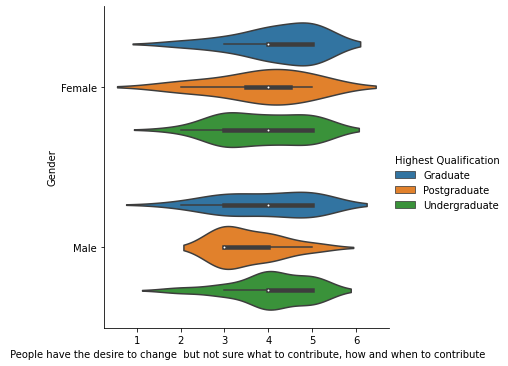

In [295]:
sns.catplot(x=" People have the desire to change  but not sure what to contribute, how and when to contribute", y="Gender", hue="Highest Qualification", kind="violin", data=df_main)


In [266]:
a = df_main[df_main['Gender'] == 'Male'][' User want s to participate but wants to keep their identity secret'].dropna()
a = a.to_numpy()
b = df_main[df_main['Gender'] == 'Female'][' User want s to participate but wants to keep their identity secret'].dropna()
b = b.to_numpy()

In [267]:
from scipy import stats
t, p = stats.ttest_ind(a,b,equal_var=False)
print("t-val = " + str(t))
print("p-val = " + str(p))

t-val = 0.38197758719627883
p-val = 0.7035414262463546


In [270]:
a = df_main[df_main['Highest Qualification'] == 'Graduate'][' User want s to participate but wants to keep their identity secret'].dropna()
a = a.to_numpy()
b = df_main[df_main['Highest Qualification'] == 'Postgraduate'][' User want s to participate but wants to keep their identity secret'].dropna()
b = b.to_numpy()


In [271]:
from scipy import stats
t, p = stats.ttest_ind(a,b,equal_var=False)
print("t-val = " + str(t))
print("p-val = " + str(p))

t-val = -1.44009008252635
p-val = 0.1580156677082157


So, Null hypothesis is accepted as p value is greater than 0.05


In [276]:
import statsmodels.api as sm
df_main1 = pd.read_excel("user_behaviour.xlsx")
df_main1 = df_main1.drop(['Name','Email','City','Unnamed: 8','Unnamed: 20','Unnamed: 21','Timestamp','GeoStamp','GeoCode','GeoAddress','Any other potential reason, for non-participation of the user in social activities which you think, should be checked to get more insights for user behavior'], axis='columns')
df_main1 = df_main1.dropna()
df_main1['Gender']=np.where(df_main1['Gender'] == 'Male',1,0)
X = df_main1['Gender']
X = sm.add_constant(X)
y= (df_main1[' People have the desire to change  but not sure what to contribute, how and when to contribute'].dropna())
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                                                  OLS Regression Results                                                                  
Dep. Variable:      People have the desire to change  but not sure what to contribute, how and when to contribute   R-squared:                       0.000
Model:                                                                                                        OLS   Adj. R-squared:                 -0.011
Method:                                                                                             Least Squares   F-statistic:                  0.005722
Date:                                                                                            Sun, 08 Aug 2021   Prob (F-statistic):              0.940
Time:                                                                                                    12:46:56   Log-Likelihood:                -120.62
No. Observations:                                                     

Null Hypothesis: There is no difference of opinions between graduates and undergraduates as well as Gender(Male and Female)  for the question " Lack of user participation is due to no formal outcomes"

Alternative Hypothesis: There is difference of opinions between graduates and undergraduates for the question "Lack of user participation is due to no formal outcomes"

Reason for this hypothesis : We would like to see that if the Geneder and Education has any impact on the **pricipal component outcome**. This will help our product team to tweak the interface for various Gender and Education level in case we figure out the **outcome principal component** has any relation.

We will test this hypothesis out using p value obtained using t-statistics.

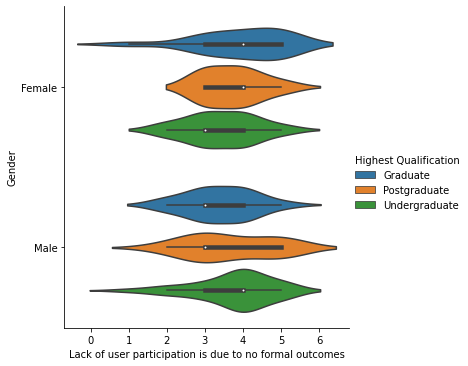

In [294]:
sns.catplot(x="Lack of user participation is due to no formal outcomes", y="Gender", hue="Highest Qualification", kind="violin", data=df_main)


In [127]:
a = df_main[df_main['Gender'] == 'Male']['Lack of user participation is due to no formal outcomes']
a = a.to_numpy()
b = df_main[df_main['Gender'] == 'Female']['Lack of user participation is due to no formal outcomes']
b = b.to_numpy()

In [128]:
t, p = stats.ttest_ind(a,b,equal_var=False)
print("t-val = " + str(t))
print("p-val = " + str(p))

t-val = -0.11564128716389842
p-val = 0.9082063476692793


In [291]:
a = df_main[df_main['Highest Qualification'] == 'Graduate']['Lack of user participation is due to no formal outcomes'].dropna()
a = a.to_numpy()
b = df_main[df_main['Highest Qualification'] == 'Undergraduate']['Lack of user participation is due to no formal outcomes'].dropna()
b = b.to_numpy()

In [292]:
t, p = stats.ttest_ind(a,b,equal_var=False)
print("t-val = " + str(t))
print("p-val = " + str(p))

t-val = 0.27254074696934266
p-val = 0.7862716764122706


In [277]:
#df_main1['Gender']=np.where(df_main1['Gender'] == 'Male',1,0)
X = df_main1['Gender']
X = sm.add_constant(X)
y= (df_main1['Lack of user participation is due to no formal outcomes'])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                               OLS Regression Results                                              
Dep. Variable:     Lack of user participation is due to no formal outcomes   R-squared:                       0.000
Model:                                                                 OLS   Adj. R-squared:                 -0.011
Method:                                                      Least Squares   F-statistic:                   0.01468
Date:                                                     Sun, 08 Aug 2021   Prob (F-statistic):              0.904
Time:                                                             12:47:15   Log-Likelihood:                -124.21
No. Observations:                                                       90   AIC:                             252.4
Df Residuals:                                                           88   BIC:                             257.4
Df Model:                                                               

Null Hypothesis: There is no difference of opinions between graduates and undergraduates as well as Gender(Male and Female)  for the question " User want s to participate but wants to keep their identity secret"

Alternative Hypothesis: There is difference of opinions between graduates and undergraduates for the question " User want s to participate but wants to keep their identity secret"

Reason for this hypothesis : We would like to see that if the Geneder and Education has any impact on the **pricipal component privacy**. This will help our product team to tweak the interface for various Gender and Education level in case we figure out the **privacy** **principal component** has any relation.

We will test this hypothesis out using p value obtained using t-statistics.

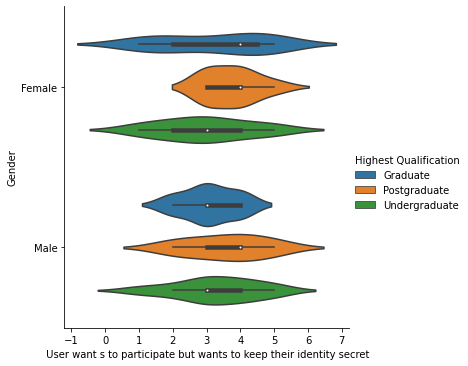

In [293]:
sns.catplot(x=" User want s to participate but wants to keep their identity secret", y="Gender", hue="Highest Qualification", kind="violin", data=df_main)


In [207]:
a = df_main[df_main['Gender'] == 'Male'][' User want s to participate but wants to keep their identity secret']
a = a.to_numpy()
b = df_main[df_main['Gender'] == 'Female'][' User want s to participate but wants to keep their identity secret']
b = b.to_numpy()

In [134]:
t, p = stats.ttest_ind(a,b,equal_var=False)
print("t-val = " + str(t))
print("p-val = " + str(p))

t-val = 0.38197758719627883
p-val = 0.7035414262463546


In [278]:
a = df_main[df_main['Highest Qualification'] == 'Graduate'][' User want s to participate but wants to keep their identity secret'].dropna()
a = a.to_numpy()
b = df_main[df_main['Highest Qualification'] == 'Postgraduate'][' User want s to participate but wants to keep their identity secret'].dropna()
b = b.to_numpy()

In [279]:
t, p = stats.ttest_ind(a,b,equal_var=False)
print("t-val = " + str(t))
print("p-val = " + str(p))

t-val = -1.44009008252635
p-val = 0.1580156677082157


In [280]:
X = df_main1['Gender']
X = sm.add_constant(X)
y= (df_main1[' User want s to participate but wants to keep their identity secret'])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                                     OLS Regression Results                                                    
Dep. Variable:      User want s to participate but wants to keep their identity secret   R-squared:                       0.004
Model:                                                                             OLS   Adj. R-squared:                 -0.007
Method:                                                                  Least Squares   F-statistic:                    0.3503
Date:                                                                 Sun, 08 Aug 2021   Prob (F-statistic):              0.555
Time:                                                                         12:48:47   Log-Likelihood:                -142.70
No. Observations:                                                                   90   AIC:                             289.4
Df Residuals:                                                                       88   BIC:           